<a href="https://colab.research.google.com/github/nouraoaldawsari/T5/blob/main/Data_Cleaning_Tutorial_Noura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import pandas as pd
import numpy as np

In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading the dataset

In [78]:
df=pd.read_csv('/content/drive/MyDrive/T5/Day3_trainee/LAB/Titanic-Dataset.csv')

In [79]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Handling Null Values

In [80]:
# Check for null values (1 line)
print(df.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [81]:
# Fill null values for 'Embarked' with the mode(1 line)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
print(df.isna().sum())  #for checking

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [82]:
# Drop rows with null values in 'Cabin' (or alternatively, you can fill it with a placeholder) (1 line)
df.dropna(subset = 'Cabin', inplace = True)
print(df.isna().sum())  #for checking

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            19
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        0
dtype: int64


# Handling Duplicates

In [83]:
# Check for duplicates (1 line)
print(df.duplicated().sum())


# Drop duplicates if any (1 line

""" there are none """

0


' there are none '

# Handling Outliers

<Axes: ylabel='Fare'>

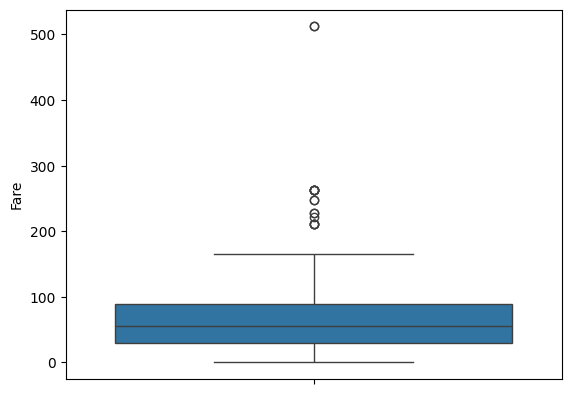

In [84]:
import seaborn as sns
sns.boxplot(df['Fare'])

<Axes: ylabel='Fare'>

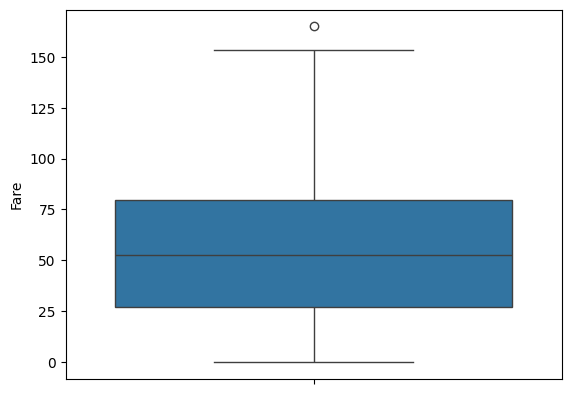

In [85]:
import numpy as np

# Function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from 'Fare' using the remove_outilers function (1 line)
removed_outliers = remove_outliers(df, 'Fare')
sns.boxplot(removed_outliers['Fare'])


# Scaling and Normalization

In [86]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standard scaling for 'Fare' (2 lines)
scaler = StandardScaler()
standarized_df = pd.DataFrame(scaler.fit_transform(df[['Fare']]))
#standarized_df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns
print("Standarized DataFrame: \n")
print(standarized_df)

# Min-Max scaling for 'Age' (2 lines)
scaler = MinMaxScaler()
minmax_df = pd.DataFrame(scaler.fit_transform(df[['Age']]))
print("Min Max DataFrame: \n")
print(minmax_df)


Standarized DataFrame: 

            0
0   -0.065466
1   -0.310494
2   -0.327170
3   -0.800999
4   -0.668266
..        ...
199 -0.317849
200 -0.958662
201  0.094554
202 -0.621776
203 -0.621776

[204 rows x 1 columns]
Min Max DataFrame: 

            0
0    0.468892
1    0.430956
2    0.671219
3    0.038948
4    0.721801
..        ...
199  0.582701
200  0.405665
201  0.696510
202  0.228629
203  0.317147

[204 rows x 1 columns]


# Encoding Categorical Variables

In [89]:
# One-hot encoding for 'Embarked' and 'Sex' (1 line)
print(df['Embarked'].unique(), "\n")
print(df['Sex'].unique(), "\n")
one_hot_encoded_df = pd.get_dummies(df, columns = ['Embarked', 'Sex'])
print(one_hot_encoded_df)

['C' 'S' 'Q'] 

['female' 'male'] 

     PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
10            11         1       3   
11            12         1       1   
..           ...       ...     ...   
871          872         1       1   
872          873         0       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name   Age  SibSp  Parch  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
6                              McCarthy, Mr. Timothy J  54.0      0      0   
10                     Sandstrom, Miss. Marguerite Rut   4.0      1      1   
11                            Bonnell, Miss. Elizabeth  58.0      0      0   
..                                     